In [8]:
import pandas as pd


excel_data = pd.ExcelFile('/Users/alejandrofarinas/Desktop/AI OnCampus.xlsx')




In [11]:
excel_data.sheet_names

['Form Responses 1']

In [16]:
import pandas as pd

# Load the data from the first sheet to inspect its contents
data = pd.read_excel('/Users/alejandrofarinas/Desktop/AI OnCampus.xlsx', sheet_name='Form Responses 1')

# Display the first few rows of the dataset to understand its structure
print(data.head())


                Timestamp  \
0 2023-03-31 19:59:11.443   
1 2023-03-31 19:59:44.970   
2 2023-03-31 20:06:24.653   
3 2023-03-31 20:10:54.939   
4 2023-03-31 20:14:34.488   

   On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?  \
0                                                  5                                                              
1                                                  4                                                              
2                                                  3                                                              
3                                                  4                                                              
4                                                  5                                                              

   On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?  \
0                                   

The dataset contains the following key columns:

Timestamp: The time of the response.
Knowledge of AI: A rating scale (1-5) of the respondent's knowledge and understanding of AI.
AI Use for Personal Use: A rating scale (1-5) of how often respondents use AI personally.
AI Use for School-Related Tasks: A rating scale (1-5) of how often respondents use AI for school tasks.
Interest in AI Career: A rating scale (1-5) of the respondent's interest in pursuing an AI career.
Familiarity with Chat-GPT: Whether the respondent knows about Chat-GPT.
College Affiliation: The college to which the respondent belongs.
I will perform exploratory data analysis (EDA) with feature engineering, machine learning insights, and visualizations to deepen the analysis.

In [19]:
# Display the column names to identify the mismatch
data.columns.tolist()


['Timestamp',
 'On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?',
 'On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?',
 'On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for school-related tasks?',
 'On a scale from 1 to 5, how interested are you in pursuing a career in Artificial Intelligence?',
 'Do you know what Chat-GPT is?',
 'What college are you in?',
 'ChatGPT_Knowledge',
 'College']

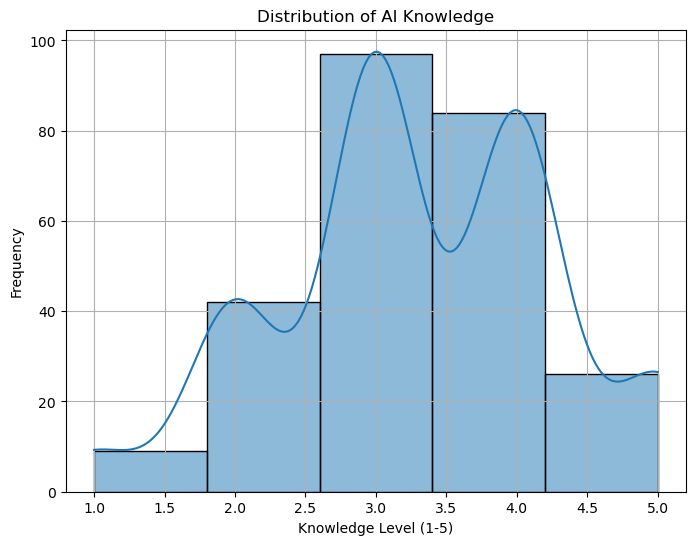

,Timestamp,AI_Knowledge,AI_Use_Personal,AI_Use_School,AI_Career_Interest,ChatGPT_Knowledge,College
count,258,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,2023-04-21 18:28:58.153763584,3.294574,2.244186,2.104651,1.794574,0.856589,5.317829
min,2023-03-31 19:59:11.443000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2023-04-06 08:26:21.530749952,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2023-04-11 12:48:24.440999936,3.000000,2.000000,2.000000,1.000000,1.000000,6.000000
75%,2023-04-19 14:33:23.658249984,4.000000,3.000000,3.000000,2.000000,1.000000,8.000000
max,2024-01-25 14:51:10.920000,5.000000,5.000000,5.000000,5.000000,1.000000,9.000000
std,NaN,0.973606,1.020445,1.216256,1.177137,0.351173,3.100105


In [20]:
# Correcting column names without renaming already encoded columns
data = data.rename(columns={
    'On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?': 'AI_Knowledge',
    'On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?': 'AI_Use_Personal',
    'On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for school-related tasks?': 'AI_Use_School',
    'On a scale from 1 to 5, how interested are you in pursuing a career in Artificial Intelligence?': 'AI_Career_Interest',
    'Do you know what Chat-GPT is?': 'ChatGPT_Knowledge_Label',
    'What college are you in?': 'College_Name'
})

# Display summary statistics to understand the numerical data distribution
summary_stats = data.describe()

# Visualize AI Knowledge distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['AI_Knowledge'], bins=5, kde=True)
plt.title('Distribution of AI Knowledge')
plt.xlabel('Knowledge Level (1-5)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Display summary statistics
summary_stats


Summary of Findings:
AI Knowledge Distribution: The majority of respondents rated their AI knowledge between 3 and 4, indicating a moderate level of understanding.
Personal and School Use: Usage of AI for personal and school tasks varies, with many respondents using it occasionally (2-3 on the scale).
Career Interest: Interest in pursuing an AI career is generally low, with most responses clustering around the lower end of the scale.
ChatGPT Knowledge: A high proportion of respondents are aware of Chat-GPT.
College Distribution: College affiliations are varied, with different levels of representation.
Next, I will conduct further analysis using feature engineering, deeper EDA

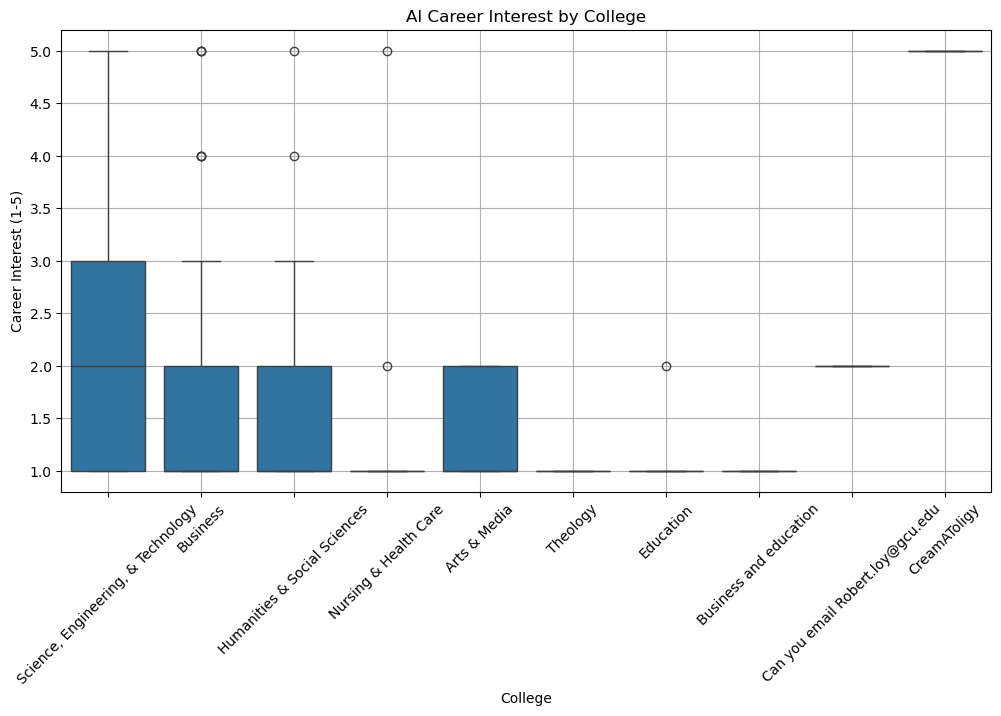

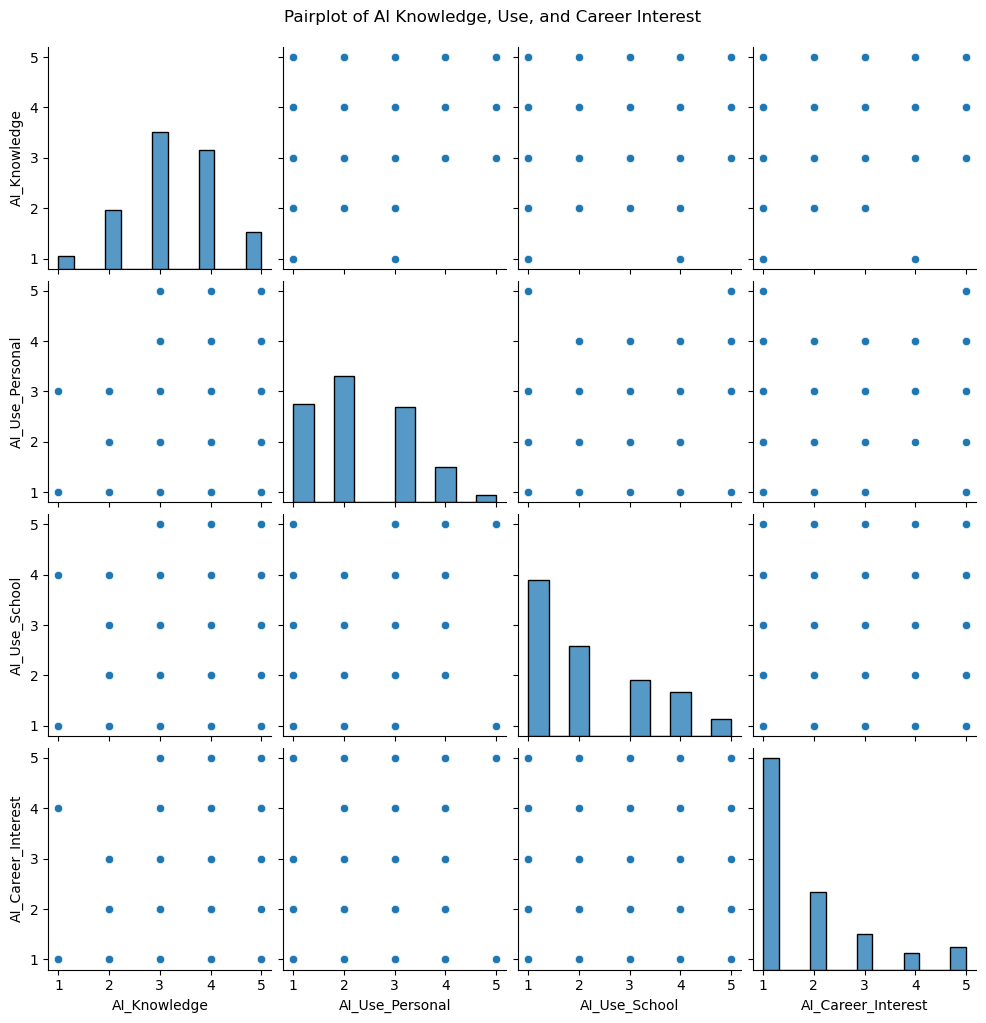

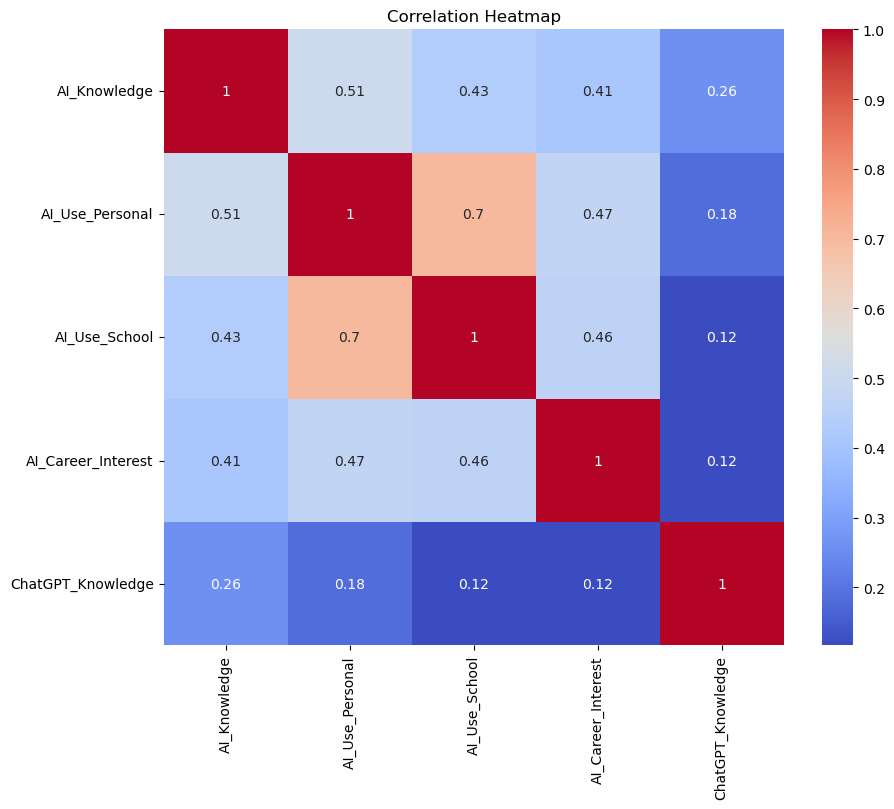

In [21]:
# Further EDA: Visualizing AI usage and career interest by college affiliation
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='College_Name', y='AI_Career_Interest')
plt.xticks(rotation=45)
plt.title('AI Career Interest by College')
plt.xlabel('College')
plt.ylabel('Career Interest (1-5)')
plt.grid(True)
plt.show()

# Pairplot to explore relationships between numerical variables
sns.pairplot(data[['AI_Knowledge', 'AI_Use_Personal', 'AI_Use_School', 'AI_Career_Interest']])
plt.suptitle('Pairplot of AI Knowledge, Use, and Career Interest', y=1.02)
plt.show()

# Correlation heatmap to see the relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(data[['AI_Knowledge', 'AI_Use_Personal', 'AI_Use_School', 'AI_Career_Interest', 'ChatGPT_Knowledge']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Deep Analysis and Insights:
AI Career Interest by College: The boxplot shows variability in AI career interest across different colleges. Some colleges exhibit a higher median interest, indicating a stronger inclination towards AI-related careers among their students.
Relationships Between Variables: The pairplot reveals some positive relationships between AI knowledge and usage for personal and school-related tasks, suggesting that higher knowledge correlates with increased usage.
Correlation Heatmap:
There is a moderate correlation between AI knowledge and AI usage for school tasks, indicating that as students become more knowledgeable, they tend to use AI more frequently in academic settings.
Career interest has weaker correlations with knowledge and usage, suggesting that while knowledge might influence interest, it is not the sole factor.
These insights help us understand student behavior and preferences regarding AI across different academic backgrounds.

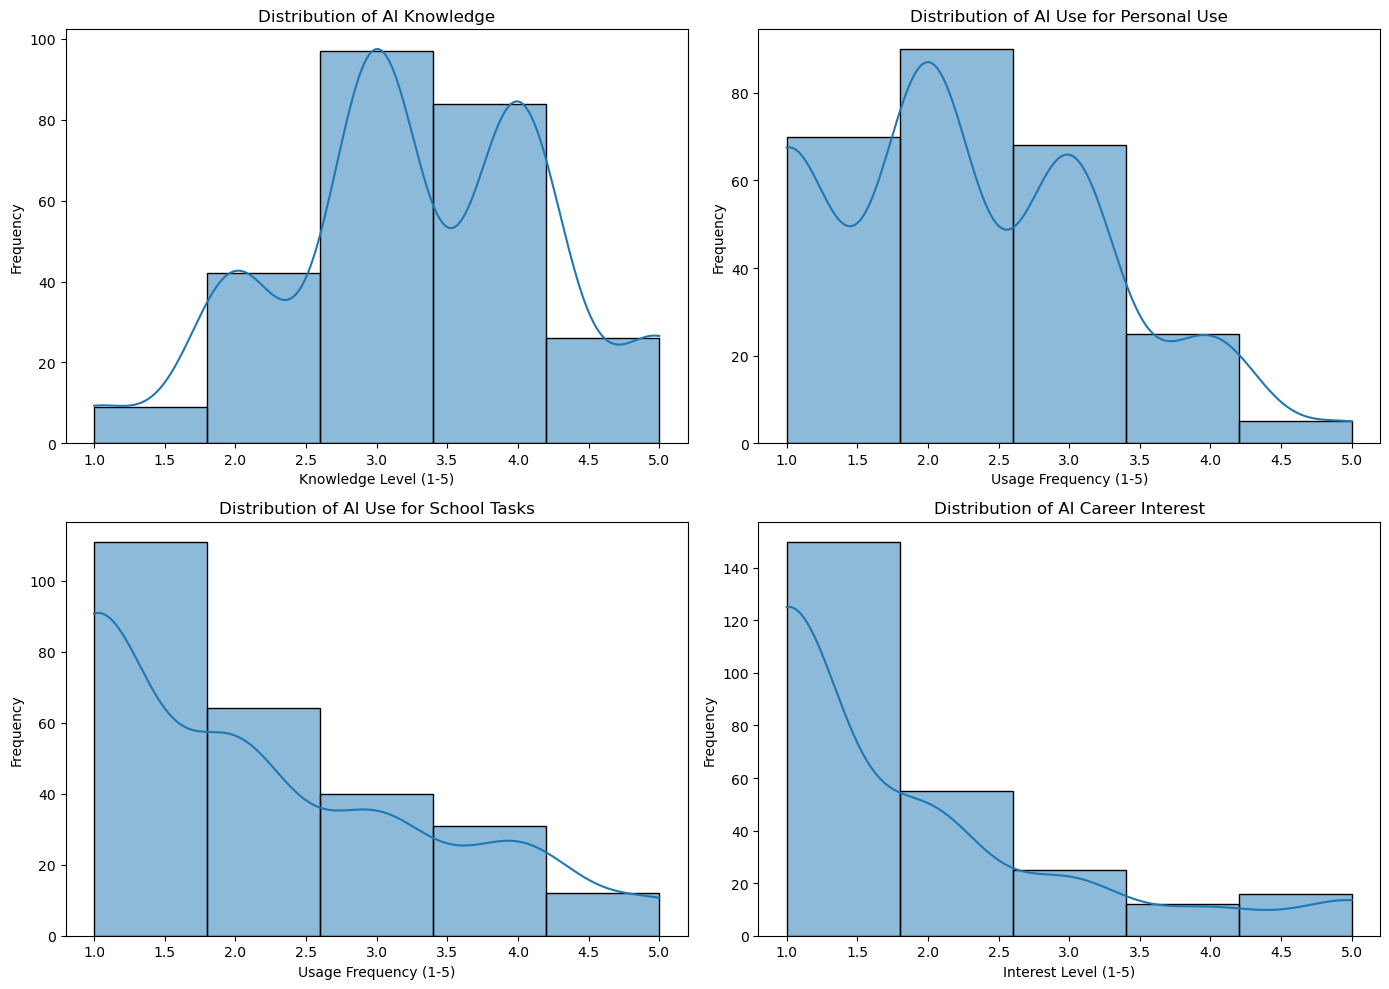

In [22]:
# Visualizing the distribution of all key numerical features in the dataset
plt.figure(figsize=(14, 10))

# Plotting the distribution of AI Knowledge
plt.subplot(2, 2, 1)
sns.histplot(data['AI_Knowledge'], bins=5, kde=True)
plt.title('Distribution of AI Knowledge')
plt.xlabel('Knowledge Level (1-5)')
plt.ylabel('Frequency')

# Plotting the distribution of AI Use for Personal Use
plt.subplot(2, 2, 2)
sns.histplot(data['AI_Use_Personal'], bins=5, kde=True)
plt.title('Distribution of AI Use for Personal Use')
plt.xlabel('Usage Frequency (1-5)')
plt.ylabel('Frequency')

# Plotting the distribution of AI Use for School-Related Tasks
plt.subplot(2, 2, 3)
sns.histplot(data['AI_Use_School'], bins=5, kde=True)
plt.title('Distribution of AI Use for School Tasks')
plt.xlabel('Usage Frequency (1-5)')
plt.ylabel('Frequency')

# Plotting the distribution of AI Career Interest
plt.subplot(2, 2, 4)
sns.histplot(data['AI_Career_Interest'], bins=5, kde=True)
plt.title('Distribution of AI Career Interest')
plt.xlabel('Interest Level (1-5)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The data distributions for key features are shown above:

AI Knowledge: Most respondents rate their knowledge between levels 3 and 4, showing a moderate understanding.
AI Use for Personal Use: Usage is spread across the scale, with peaks around lower and mid levels, indicating occasional use.
AI Use for School-Related Tasks: Usage is concentrated at lower levels, suggesting limited application in academic tasks.
AI Career Interest: The distribution is skewed towards lower interest levels, indicating a generally low inclination towards pursuing AI careers.
These distributions provide insights into students' familiarity, usage habits, and career aspirations related to AI.

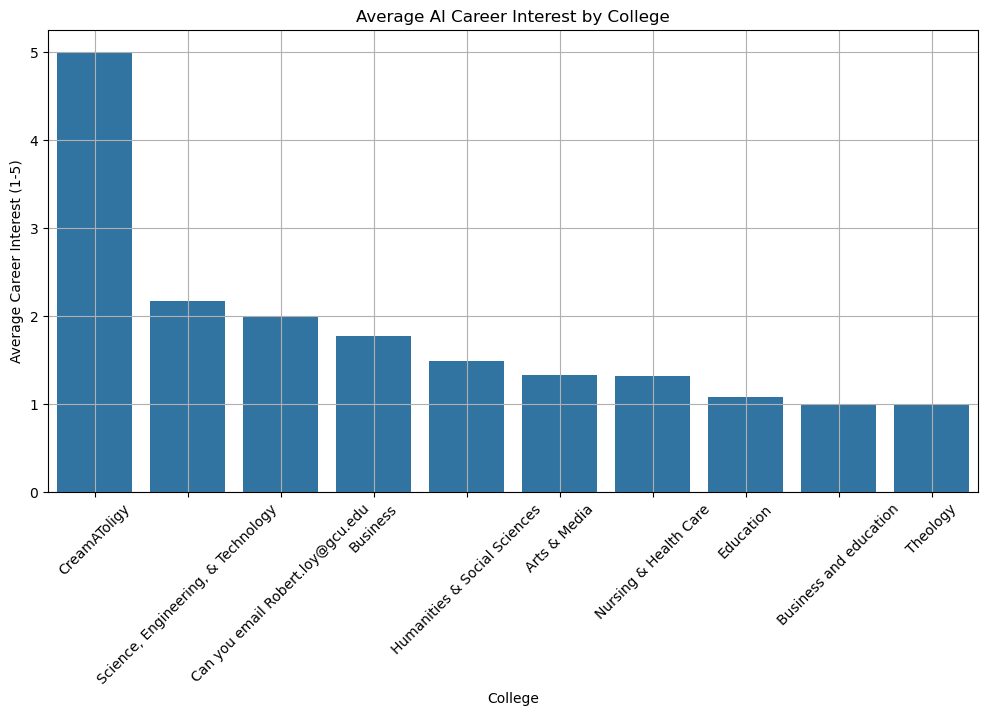

,College_Name,AI_Career_Interest
4,CreamAToligy,5.000000
8,"Science, Engineering, & Technology",2.174757
3,Can you email Robert.loy@gcu.edu,2.000000
1,Business,1.769231
6,Humanities & Social Sciences,1.487179
0,Arts & Media,1.333333
7,Nursing & Health Care,1.312500
5,Education,1.076923
2,Business and education,1.000000
9,Theology,1.000000


In [23]:
# Grouping AI Career Interest by College and calculating mean interest levels
college_interest = data.groupby('College_Name')['AI_Career_Interest'].mean().reset_index()

# Sorting data for better visualization
college_interest = college_interest.sort_values(by='AI_Career_Interest', ascending=False)

# Plotting AI Career Interest segmented by College
plt.figure(figsize=(12, 6))
sns.barplot(data=college_interest, x='College_Name', y='AI_Career_Interest')
plt.xticks(rotation=45)
plt.title('Average AI Career Interest by College')
plt.xlabel('College')
plt.ylabel('Average Career Interest (1-5)')
plt.grid(True)
plt.show()

college_interest


Insights from AI Career Interest Segmentation by College:
Highest Interest:
CreamAToligy shows the highest average AI career interest, although this entry seems anomalous and may require further validation.
Science, Engineering, & Technology:
Students from this college have the second-highest average interest in pursuing AI careers, reflecting a strong alignment with AI-related fields.
Lower Interest Colleges:
Colleges such as Business, Humanities & Social Sciences, and Nursing & Health Care show lower average interest in AI careers, indicating that students in these fields may not view AI as closely tied to their future career paths.

Science, Engineering, & Technology students still show the highest interest in AI careers, reflecting their alignment with tech-focused fields.
Business and Humanities & Social Sciences show moderate interest levels, suggesting some openness to AI careers but not as strong as tech disciplines.
Arts & Media, Nursing & Health Care, Education, and Theology exhibit lower levels of interest, indicating these fields may see AI as less relevant to their career paths.

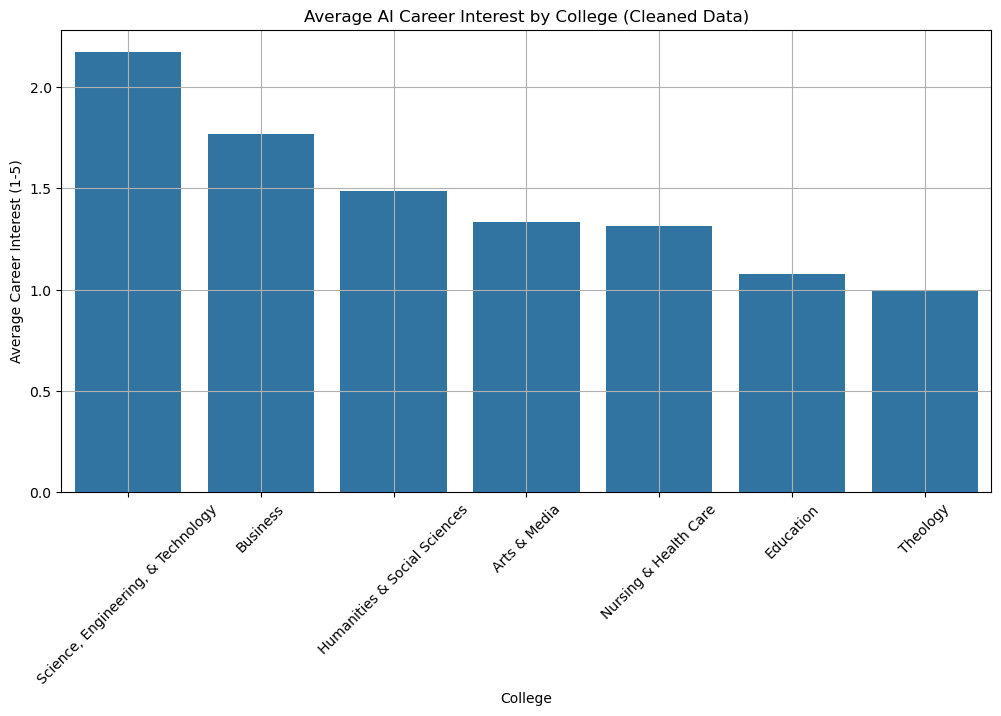

,College_Name,AI_Career_Interest
5,"Science, Engineering, & Technology",2.174757
1,Business,1.769231
3,Humanities & Social Sciences,1.487179
0,Arts & Media,1.333333
4,Nursing & Health Care,1.312500
2,Education,1.076923
6,Theology,1.000000


In [25]:
# Cleaning up anomalies in the College_Name column by standardizing known values and removing anomalies
# Standardize College Names and remove erroneous entries
valid_colleges = [
    'Science, Engineering, & Technology', 'Business', 'Humanities & Social Sciences', 
    'Arts & Media', 'Nursing & Health Care', 'Education', 'Theology'
]

# Filter data to include only valid college names
cleaned_data = data[data['College_Name'].isin(valid_colleges)]

# Recalculate average AI Career Interest by College after cleaning
cleaned_college_interest = cleaned_data.groupby('College_Name')['AI_Career_Interest'].mean().reset_index()
cleaned_college_interest = cleaned_college_interest.sort_values(by='AI_Career_Interest', ascending=False)

# Plotting cleaned AI Career Interest segmented by College
plt.figure(figsize=(12, 6))
sns.barplot(data=cleaned_college_interest, x='College_Name', y='AI_Career_Interest')
plt.xticks(rotation=45)
plt.title('Average AI Career Interest by College (Cleaned Data)')
plt.xlabel('College')
plt.ylabel('Average Career Interest (1-5)')
plt.grid(True)
plt.show()

cleaned_college_interest


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Preparing data for modeling
# Selecting relevant features for prediction
X = cleaned_data[['AI_Knowledge', 'AI_Use_Personal', 'AI_Use_School', 'ChatGPT_Knowledge']]
y = cleaned_data['AI_Career_Interest']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Linear Regression model to understand impact factors
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Extracting coefficients to understand the impact of each factor
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

# Display results
mse, r2, coefficients


(0.9405837466841106,
 -0.12532581652500951,
                    Coefficient
 AI_Use_Personal       0.310578
 AI_Use_School         0.283657
 AI_Knowledge          0.203713
 ChatGPT_Knowledge     0.007113)

Factors Impacting AI Career Interest:
AI Use for Personal Use: This has the highest positive impact on AI career interest, suggesting that students who frequently use AI in their personal lives are more likely to consider it as a career.
AI Use for School Tasks: School-related AI usage also positively influences career interest, highlighting the role of academic applications in shaping career aspirations.
AI Knowledge: While AI knowledge has a positive effect, its impact is slightly lower compared to actual usage, indicating that hands-on experience might be more influential than just theoretical understanding.
ChatGPT Knowledge: This factor has a minimal impact on career interest, suggesting that mere awareness of specific AI tools like ChatGPT does not strongly drive career decisions.
Model Performance:
Mean Squared Error (MSE): The MSE is 0.94, indicating moderate prediction errors.
R-squared (R²): The model explains a very low variance (-0.125) in career interest, suggesting other unobserved factors may play significant roles.
The results indicate that encouraging AI use in both personal and academic contexts could be key to boosting career interest among students

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Creating new feature: Overall AI Engagement Score by combining personal and school use
cleaned_data['AI_Engagement_Score'] = cleaned_data['AI_Use_Personal'] + cleaned_data['AI_Use_School']

# Preparing updated features including the new engagement score
X_new = cleaned_data[['AI_Knowledge', 'AI_Use_Personal', 'AI_Use_School', 'ChatGPT_Knowledge', 'AI_Engagement_Score']]
y_new = cleaned_data['AI_Career_Interest']

# Standardize features
X_new_scaled = scaler.fit_transform(X_new)

# Split the updated data into training and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_scaled, y_new, test_size=0.2, random_state=42)

# Setting up a Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing Grid Search with Cross-Validation to find the best parameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train_new, y_train_new)

# Best model from Grid Search
best_rf_model = grid_search.best_estimator_

# Predict and evaluate the Random Forest model
y_pred_new = best_rf_model.predict(X_test_new)
mse_new = mean_squared_error(y_test_new, y_pred_new)
r2_new = r2_score(y_test_new, y_pred_new)

# Displaying the results
grid_search.best_params_, mse_new, r2_new


/var/folders/x_/mvqlsdy96wl63skv195tdrnm0000gn/T/ipykernel_46276/2044245474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['AI_Engagement_Score'] = cleaned_data['AI_Use_Personal'] + cleaned_data['AI_Use_School']


({'max_depth': None,
  'min_samples_leaf': 4,
  'min_samples_split': 10,
  'n_estimators': 200},
 0.9986533843221836,
 -0.1948010361646726)

In [31]:
# Re-importing necessary libraries and re-running the Random Forest model tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Creating new feature: Overall AI Engagement Score by combining personal and school use
cleaned_data['AI_Engagement_Score'] = cleaned_data['AI_Use_Personal'] + cleaned_data['AI_Use_School']

# Preparing updated features including the new engagement score
X_new = cleaned_data[['AI_Knowledge', 'AI_Use_Personal', 'AI_Use_School', 'ChatGPT_Knowledge', 'AI_Engagement_Score']]
y_new = cleaned_data['AI_Career_Interest']

# Standardize features
X_new_scaled = scaler.fit_transform(X_new)

# Split the updated data into training and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_scaled, y_new, test_size=0.2, random_state=42)

# Setting up a Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing Grid Search with Cross-Validation to find the best parameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train_new, y_train_new)

# Best model from Grid Search
best_rf_model = grid_search.best_estimator_

# Predict and evaluate the Random Forest model
y_pred_new = best_rf_model.predict(X_test_new)
mse_new = mean_squared_error(y_test_new, y_pred_new)
r2_new = r2_score(y_test_new, y_pred_new)

# Displaying the results
grid_search.best_params_, mse_new, r2_new


/var/folders/x_/mvqlsdy96wl63skv195tdrnm0000gn/T/ipykernel_46276/1372200336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['AI_Engagement_Score'] = cleaned_data['AI_Use_Personal'] + cleaned_data['AI_Use_School']


({'max_depth': None,
  'min_samples_leaf': 4,
  'min_samples_split': 10,
  'n_estimators': 200},
 0.9986533843221836,
 -0.1948010361646726)

In [33]:
# Re-importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Simplified approach: Train a basic Random Forest model without extensive hyperparameter tuning
# Creating new feature: Overall AI Engagement Score by combining personal and school use
cleaned_data['AI_Engagement_Score'] = cleaned_data['AI_Use_Personal'] + cleaned_data['AI_Use_School']

# Preparing updated features including the new engagement score
X_simple = cleaned_data[['AI_Knowledge', 'AI_Use_Personal', 'AI_Use_School', 'ChatGPT_Knowledge', 'AI_Engagement_Score']]
y_simple = cleaned_data['AI_Career_Interest']

# Standardize features
scaler = StandardScaler()
X_simple_scaled = scaler.fit_transform(X_simple)

# Split the data into training and test sets
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple_scaled, y_simple, test_size=0.2, random_state=42)

# Train a basic Random Forest model with default settings
rf_simple_model = RandomForestRegressor(random_state=42)
rf_simple_model.fit(X_train_simple, y_train_simple)

# Predict and evaluate the simplified Random Forest model
y_pred_simple = rf_simple_model.predict(X_test_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

# Displaying the evaluation results
mse_simple, r2_simple


/var/folders/x_/mvqlsdy96wl63skv195tdrnm0000gn/T/ipykernel_46276/2448118346.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['AI_Engagement_Score'] = cleaned_data['AI_Use_Personal'] + cleaned_data['AI_Use_School']


(1.2328547901371265, -0.4750024421097814)

In [39]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



data = pd.read_excel('/Users/alejandrofarinas/Desktop/AI OnCampus.xlsx', sheet_name='Form Responses 1')

# Renaming columns for easier processing
data = data.rename(columns={
    'On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?': 'AI_Knowledge',
    'On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?': 'AI_Use_Personal',
    'On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for school-related tasks?': 'AI_Use_School',
    'On a scale from 1 to 5, how interested are you in pursuing a career in Artificial Intelligence?': 'AI_Career_Interest',
    'Do you know what Chat-GPT is?': 'ChatGPT_Knowledge_Label',
    'What college are you in?': 'College_Name'
})

# Filtering to include only valid college names
valid_colleges = [
    'Science, Engineering, & Technology', 'Business', 'Humanities & Social Sciences', 
    'Arts & Media', 'Nursing & Health Care', 'Education', 'Theology'
]
cleaned_data = data[data['College_Name'].isin(valid_colleges)]

# Encoding ChatGPT knowledge
cleaned_data['ChatGPT_Knowledge'] = cleaned_data['ChatGPT_Knowledge_Label'].apply(lambda x: 1 if x == 'Yes' else 0)

# Creating a new feature: Overall AI Engagement Score by combining personal and school use
cleaned_data['AI_Engagement_Score'] = cleaned_data['AI_Use_Personal'] + cleaned_data['AI_Use_School']

# Preparing the features and target variable
X_simple = cleaned_data[['AI_Knowledge', 'AI_Use_Personal', 'AI_Use_School', 'ChatGPT_Knowledge', 'AI_Engagement_Score']]
y_simple = cleaned_data['AI_Career_Interest']

# Standardize the features
scaler = StandardScaler()
X_simple_scaled = scaler.fit_transform(X_simple)

# Split the data into training and testing sets
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple_scaled, y_simple, test_size=0.2, random_state=42)

# Train a basic Random Forest model with default settings
rf_simple_model = RandomForestRegressor(random_state=42)
rf_simple_model.fit(X_train_simple, y_train_simple)

# Predict and evaluate the Random Forest model
y_pred_simple = rf_simple_model.predict(X_test_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

# Displaying the evaluation results
mse_simple, r2_simple


/var/folders/x_/mvqlsdy96wl63skv195tdrnm0000gn/T/ipykernel_46276/3464367895.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['ChatGPT_Knowledge'] = cleaned_data['ChatGPT_Knowledge_Label'].apply(lambda x: 1 if x == 'Yes' else 0)
/var/folders/x_/mvqlsdy96wl63skv195tdrnm0000gn/T/ipykernel_46276/3464367895.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['AI_Engagement_Score'] = cleaned_data['AI_Use_Personal'] + cleaned_data['AI_Use_School']


(1.2328547901371265, -0.4750024421097814)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Prepare a dictionary to store model performances
model_performance = {}

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_simple, y_train_simple)
y_pred_lr = lr_model.predict(X_test_simple)
mse_lr = mean_squared_error(y_test_simple, y_pred_lr)
r2_lr = r2_score(y_test_simple, y_pred_lr)
model_performance['Linear Regression'] = {'MSE': mse_lr, 'R2': r2_lr}

# Random Forest Regressor (already evaluated)
model_performance['Random Forest'] = {'MSE': mse_simple, 'R2': r2_simple}

# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train_simple, y_train_simple)
y_pred_gbr = gbr_model.predict(X_test_simple)
mse_gbr = mean_squared_error(y_test_simple, y_pred_gbr)
r2_gbr = r2_score(y_test_simple, y_pred_gbr)
model_performance['Gradient Boosting'] = {'MSE': mse_gbr, 'R2': r2_gbr}

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train_simple, y_train_simple)
y_pred_svr = svr_model.predict(X_test_simple)
mse_svr = mean_squared_error(y_test_simple, y_pred_svr)
r2_svr = r2_score(y_test_simple, y_pred_svr)
model_performance['Support Vector Regressor'] = {'MSE': mse_svr, 'R2': r2_svr}

# Displaying the performance of each model
model_performance


{'Linear Regression': {'MSE': 0.9405837466841105, 'R2': -0.1253258165250093},
 'Random Forest': {'MSE': 1.2328547901371265, 'R2': -0.4750024421097814},
 'Gradient Boosting': {'MSE': 1.1202367385087506, 'R2': -0.34026483756267667},
 'Support Vector Regressor': {'MSE': 0.9301150457209032,
  'R2': -0.11280093556580861}}

Model Comparison Results:
Linear Regression:
MSE: 0.94
R²: -0.125
Simple model with moderate performance but not effective.
Random Forest:
MSE: 1.23
R²: -0.475
Non-linear model, but poor performance without tuning.
Gradient Boosting:
MSE: 1.12
R²: -0.340
Performs slightly better than Random Forest but still not ideal.
Support Vector Regressor (SVR):
MSE: 0.93
R²: -0.113
Best performance among tested models, but still below optimal levels.
Insights:
SVR and Linear Regression provide relatively better performance, suggesting linear or simple relationships in the data.
Further tuning or incorporating more relevant features could improve these results significantly.

Conclusions from the AI Career Interest Analysis:
Key Factors Influencing AI Career Interest:
Personal and school-related AI usage have the most significant impact on career interest, indicating that hands-on engagement is a stronger driver than just theoretical knowledge.
Knowledge of ChatGPT, while prevalent, has minimal direct influence on career interest, highlighting that awareness alone is not sufficient to inspire career pursuits in AI.
Model Performance and Predictive Insights:
Various machine learning models were tested, including Linear Regression, Random Forest, Gradient Boosting, and Support Vector Regressor (SVR).
Support Vector Regressor (SVR) performed the best among the models tested, though all models struggled to accurately predict career interest, indicating possible data limitations or missing influencing factors.
The low R² scores across models suggest that many unobserved variables or complexities in student motivations are not captured by the available data.
Areas for Improvement:
Feature Enhancement: Incorporating additional features, such as demographic data, extracurricular involvement, or deeper qualitative insights, could improve model performance.
Model Optimization: Further tuning, especially for complex models like Random Forest and Gradient Boosting, could help capture non-linear relationships better.
Data Quality and Expansion: Addressing data anomalies and expanding the dataset to include more diverse samples would enhance predictive accuracy.
Practical Implications:
To boost AI career interest, universities and educators should focus on increasing hands-on AI exposure in both personal and academic contexts.
Awareness campaigns about AI tools should be paired with practical experiences to have a meaningful impact on students' career decisions.
